In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df=pd.read_csv('D:\\ANALYTICS\\GREAT LEARNING\\20.Predictive Modelling-Week-4\\Holiday_Package.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [4]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [36]:
df.tail()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes
871,no,74659,51,10,0,0,yes


In [37]:
df.shape

(872, 7)

In [6]:
df.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [7]:
df.describe(include=['O'])

,Holliday_Package,foreign
count,872,872
unique,2,2
top,no,no
freq,471,656


In [9]:
df.groupby(by=['Holliday_Package']).count()

,Salary,age,educ,no_young_children,no_older_children,foreign
Holliday_Package,,,,,,
no,471,471,471,471,471,471
yes,401,401,401,401,401,401


In [27]:
df.groupby(by=['foreign','Holliday_Package']).size().reset_index(name='Freq')

,foreign,Holliday_Package,Freq
0,no,no,402
1,no,yes,254
2,yes,no,69
3,yes,yes,147


We could see of the foreigners majority opt for holiday package where as for those who are not foreigners do not opt for  
holiday package

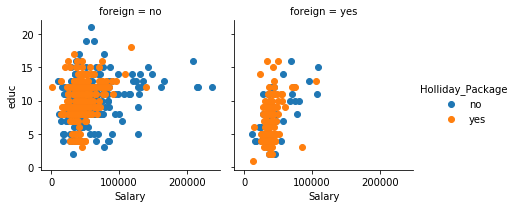

In [22]:
g=sns.FacetGrid(df,col='foreign',hue='Holliday_Package')
g.map(plt.scatter,'Salary','educ').add_legend()

For both foreigners and residents we could see opting holiday packages are the most for those who are earning between  
0-70K and also who has years of education between 0-10.

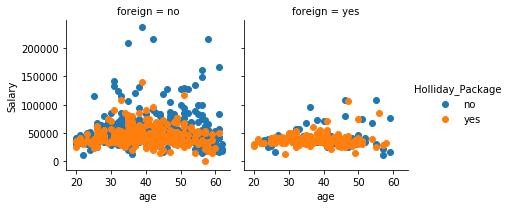

In [29]:
g=sns.FacetGrid(df,col='foreign',hue='Holliday_Package')
g.map(plt.scatter,'age','Salary').add_legend()

We could see there heavy concentration of employess opting for package whose age are in range between 30-45.  
Since most of the employees in the dataset has salary in between 0-1Lac we are unable to find a trend who are earning   
1Lac and above.

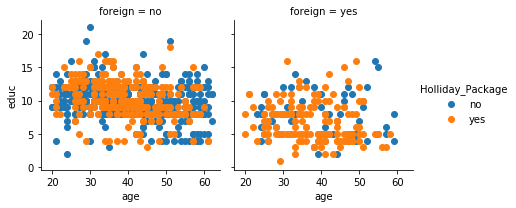

In [30]:
g=sns.FacetGrid(df,col='foreign',hue='Holliday_Package')
g.map(plt.scatter,'age','educ').add_legend()

Foreigners opt for the package irrespective of the age but as we go up the years of the education opting diminishes.  
While for residents most of the people opted as years of education between 10-15 and age between 30-45

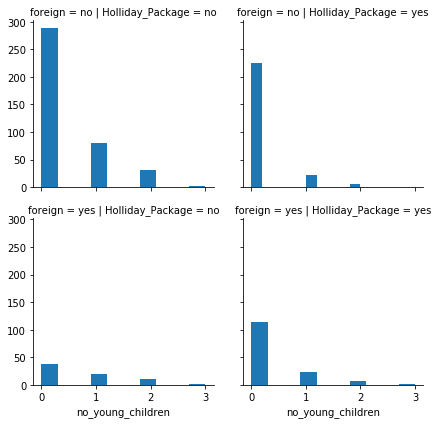

In [34]:
g=sns.FacetGrid(df,col='Holliday_Package',row='foreign')
g.map(plt.hist,'no_young_children').add_legend()

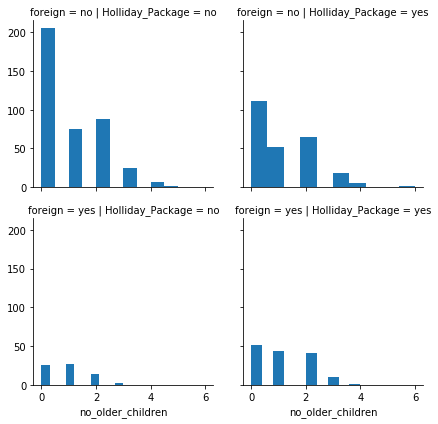

In [35]:
g=sns.FacetGrid(df,col='Holliday_Package',row='foreign')
g.map(plt.hist,'no_older_children').add_legend()

Generally for an employees having more no: of children there is a decreasing trend for opting the package.Employees  
who has no children tend to opt for the Holiday Package.

<b>2.2) Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train  
and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).</b>

<b>Assigning numeric to indicate the categories</b>

In [39]:
df.loc[df['Holliday_Package']=='yes','Holliday_Package']=1
df.loc[df['Holliday_Package']=='no','Holliday_Package']=0

In [41]:
df.loc[df['foreign']=='yes','foreign']=1
df.loc[df['foreign']=='no','foreign']=0

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [46]:
df['foreign']=df['foreign'].astype('int64')

In [47]:
df['Holliday_Package']=df['Holliday_Package'].astype('int64')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int64
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int64
dtypes: int64(7)
memory usage: 47.8 KB


<b>Combining no_older children and no_young_children</b>

In [50]:
df['no_children']=df['no_young_children']+df['no_older_children']

In [53]:
df_bkup=df.copy()

In [54]:
df.drop(['no_young_children','no_older_children'],axis=1,inplace=True)

In [55]:
df.head()

,Holliday_Package,Salary,age,educ,foreign,no_children
0,0,48412,30,8,0,2
1,1,37207,45,8,0,1
2,0,58022,46,9,0,0
3,0,66503,31,11,0,2
4,0,66734,44,12,0,2


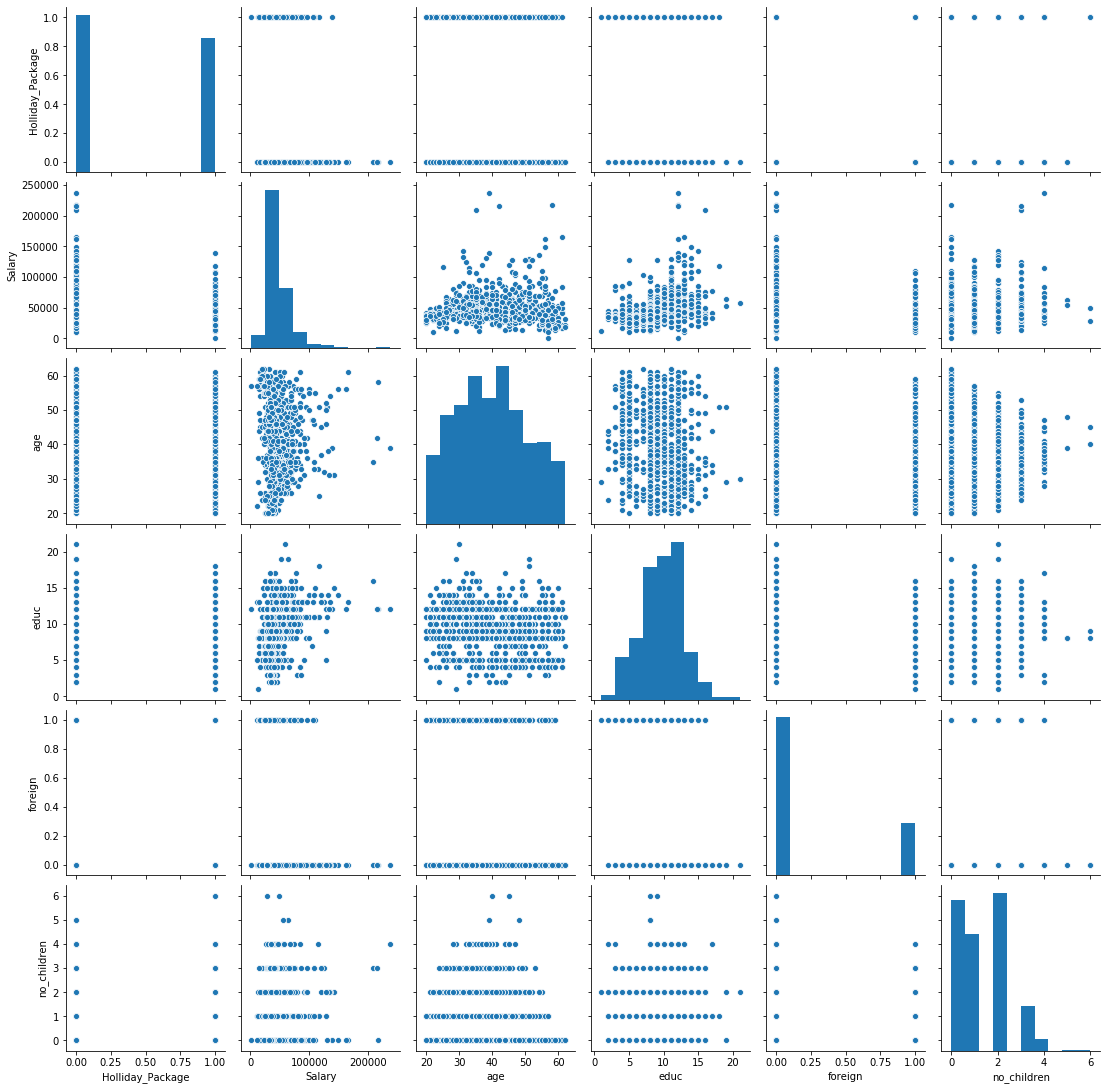

In [69]:
sns.pairplot(df.astype('int64'))

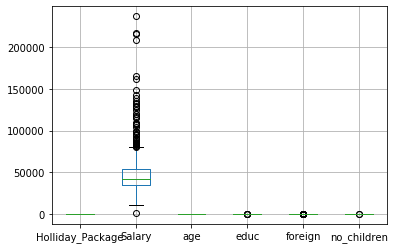

In [78]:
df.boxplot()

Here we avoid treating outliers since we may miss some important information on employees earning higher salaries  
and having higher education

In [72]:
X=df.drop('Holliday_Package',axis=1)
y=df['Holliday_Package']

In [73]:
X.head()

,Salary,age,educ,foreign,no_children
0,48412,30,8,0,2
1,37207,45,8,0,1
2,58022,46,9,0,0
3,66503,31,11,0,2
4,66734,44,12,0,2


In [74]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Holliday_Package, dtype: int64

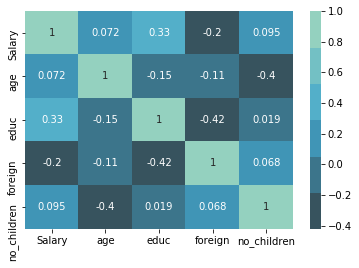

In [75]:
sns.heatmap(X.corr(),cmap=sns.color_palette("GnBu_d"),annot=True)

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [77]:
log_model=LogisticRegression()

In [79]:
lda_model=LinearDiscriminantAnalysis()

In [80]:
#Logistic Regression on train data
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
#LDA on train data
lda_model.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

<b>1)Model Performance on trained data</b>

In [84]:
y_pred_logtrain=log_model.predict(X_train)
y_pred_ldatrain=lda_model.predict(X_train)
acc_score_logtrain=log_model.score(X_train,y_train)
acc_score_ldatrain=lda_model.score(X_train,y_train)

In [87]:
print('***********************Classificiation Report and Confusion Matrix*************************')
print('************Logistic Regression*************')
print('Confusion Matrix')
print(confusion_matrix(y_train,y_pred_logtrain))
print('Classification Report')
print(classification_report(y_train,y_pred_logtrain))
print('*******************LDA************************')
print('Confusion Matrix')
print(confusion_matrix(y_train,y_pred_ldatrain))
print('Classification Report')
print(classification_report(y_train,y_pred_ldatrain))

***********************Classificiation Report and Confusion Matrix*************************
************Logistic Regression*************
Confusion Matrix
[[296  30]
 [261  23]]
Classification Report
              precision    recall  f1-score   support

           0       0.53      0.91      0.67       326
           1       0.43      0.08      0.14       284

    accuracy                           0.52       610
   macro avg       0.48      0.49      0.40       610
weighted avg       0.49      0.52      0.42       610

*******************LDA************************
Confusion Matrix
[[263  63]
 [155 129]]
Classification Report
              precision    recall  f1-score   support

           0       0.63      0.81      0.71       326
           1       0.67      0.45      0.54       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610



<b>Logistic Regression-Train</b>

In [91]:
from sklearn.metrics import roc_auc_score,roc_curve

AUC: 0.566


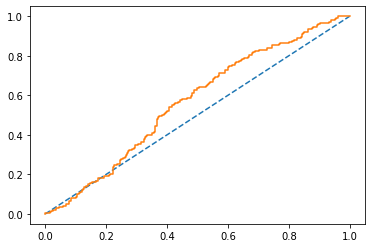

In [92]:
probs =log_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

Logistic Regression-Model

<b>Linear Discrminant Analysis-Train</b>

AUC: 0.666


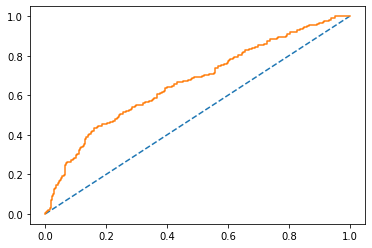

In [93]:
probs =lda_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

LDA-Model

<b>2)Model performance on test data</b>

In [88]:
y_pred_logtest=log_model.predict(X_test)
y_pred_ldatest=lda_model.predict(X_test)
acc_score_logtest=log_model.score(X_test,y_test)
acc_score_ldatest=lda_model.score(X_test,y_test)

In [89]:
print('***********************Classificiation Report and Confusion Matrix*************************')
print('************Logistic Regression*************')
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred_logtest))
print('Classification Report')
print(classification_report(y_test,y_pred_logtest))
print('*******************LDA************************')
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred_ldatest))
print('Classification Report')
print(classification_report(y_test,y_pred_ldatest))

***********************Classificiation Report and Confusion Matrix*************************
************Logistic Regression*************
Confusion Matrix
[[132  13]
 [107  10]]
Classification Report
              precision    recall  f1-score   support

           0       0.55      0.91      0.69       145
           1       0.43      0.09      0.14       117

    accuracy                           0.54       262
   macro avg       0.49      0.50      0.42       262
weighted avg       0.50      0.54      0.44       262

*******************LDA************************
Confusion Matrix
[[108  37]
 [ 66  51]]
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.74      0.68       145
           1       0.58      0.44      0.50       117

    accuracy                           0.61       262
   macro avg       0.60      0.59      0.59       262
weighted avg       0.60      0.61      0.60       262



<b>Logistic Regression-Test</b>

AUC: 0.626


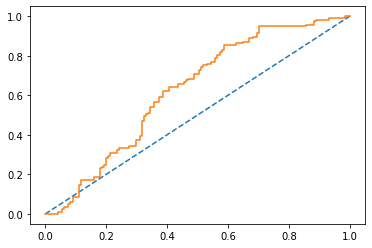

In [94]:
probs =log_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

Logistic Regression-Test

<b>LDA-Test</b>

AUC: 0.642


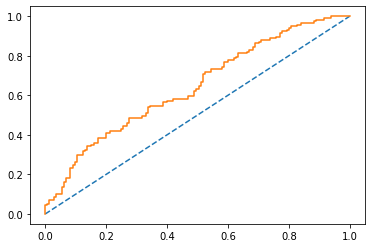

In [95]:
probs =lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

LDA-Test